In [1]:
#from experiment_logger import ExperimentLogger

In [2]:
# Biliotecas

# Tratamento dos dados
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)

# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# !pip install pandas matplotlib seaborn
# !pip install lifelines # regressão cox
# !pip install neurokit2
#!pip install jinja2
#pip install tensorflow keras lifelines



# Informações das Colunas

### Identificação e Acompanhamento
- **Patient ID**: Identificação única de cada paciente.
- **Follow-up period from enrollment (days)**: Período de acompanhamento em dias desde o início da participação do paciente no estudo.
- **days_4years**: Dias equivalentes a 4 anos (para controle de tempo de acompanhamento).
- **Exit of the study**: Motivo pelo qual o paciente saiu do estudo (ex: alta, falecimento).
- **Cause of death**: Causa de morte, se houver (0 significa que o paciente não faleceu durante o estudo).

### Eventos e Condições Cardiovasculares
- **SCD_4years SinusRhythm**: Morte súbita cardíaca (Sudden Cardiac Death) em 4 anos, durante ritmo sinusal.
- **HF_4years SinusRhythm**: Insuficiência cardíaca (Heart Failure) em 4 anos, durante ritmo sinusal.
- **Number of ventricular premature contractions per hour**: Número de contrações ventriculares prematuras por hora.
- **Non-sustained ventricular tachycardia (CH>10)**: Taquicardia ventricular não sustentada, quando o número de contrações ventriculares prematuras é maior que 10.
- **Number of supraventricular premature beats in 24h**: Número de batimentos supraventriculares prematuros em 24 horas.
- **Paroxysmal supraventricular tachyarrhythmia**: Taquiarritmia supraventricular paroxística.
  
### Dados Demográficos e Clínicos
- **Age**: Idade do paciente.
- **Gender (male=1)**: Gênero do paciente (1 para masculino, 0 para feminino).
- **Weight (kg)**: Peso do paciente em quilogramas.
- **Height (cm)**: Altura do paciente em centímetros.
- **Body Mass Index (Kg/m2)**: Índice de Massa Corporal (IMC) do paciente.
- **NYHA class**: Classe de insuficiência cardíaca segundo a classificação da New York Heart Association (NYHA).

### Sinais Vitais e Diagnósticos
- **Diastolic blood pressure (mmHg)**: Pressão arterial diastólica (mmHg).
- **Systolic blood pressure (mmHg)**: Pressão arterial sistólica (mmHg).
- **HF etiology - Diagnosis**: Etiologia da insuficiência cardíaca ou diagnóstico inicial.

### Comorbidades e Históricos Médicos
- **Diabetes (yes=1)**: Histórico de diabetes.
- **History of dyslipemia (yes=1)**: Histórico de dislipidemia.
- **Peripheral vascular disease (yes=1)**: Doença vascular periférica.
- **History of hypertension (yes=1)**: Histórico de hipertensão.
- **Prior Myocardial Infarction (yes=1)**: Infarto do miocárdio prévio.
- **Prior implantable device**: Dispositivo implantável (ex: marcapasso).
- **Prior Revascularization**: Procedimento de revascularização prévio (ex: bypass coronariano).
- **Syncope**: Episódios de síncope (desmaios).

### Hábitos e Consumos
- **daily smoking (cigarettes/day)**: Número de cigarros por dia.
- **smoke-free time (years)**: Anos desde que parou de fumar.
- **cigarettes/year**: Consumo anual de cigarros.
- **alcohol consumption (standard units)**: Consumo de álcool em unidades padrão.

### Exames Laboratoriais
- **Albumin (g/L)**: Níveis de albumina no sangue.
- **ALT or GPT (IU/L)**: Níveis da enzima ALT ou GPT.
- **AST or GOT (IU/L)**: Níveis da enzima AST ou GOT.
- **Normalized Troponin**: Troponina normalizada.
- **Total Cholesterol (mmol/L)**: Colesterol total.
- **Creatinine (µmol/L)**: Creatinina.
- **Gamma-glutamil transpeptidase (IU/L)**: GGT.
- **Glucose (mmol/L)**: Glicose.
- **Hemoglobin (g/L)**: Hemoglobina.
- **HDL (mmol/L)**: Colesterol HDL.
- **Potassium (mEq/L)**: Potássio.
- **LDL (mmol/L)**: Colesterol LDL.
- **Sodium (mEq/L)**: Sódio.
- **Pro-BNP (ng/L)**: Peptídeo natriurético pró-cerebral.
- **Protein (g/L)**: Proteínas totais.
- **T3 (pg/dL)**: Triiodotironina (T3).
- **T4 (ng/L)**: Tiroxina (T4).
- **Troponin (ng/mL)**: Troponina.
- **TSH (mIU/L)**: Hormônio estimulante da tireoide.
- **Urea (mg/dL)**: Ureia.

### Exames de Imagem e Medidas Cardíacas
- **Signs of pulmonary venous hypertension (yes=1)**: Sinais de hipertensão venosa pulmonar.
- **Cardiothoracic ratio**: Razão cardiotorácica.
- **Left atrial size (mm)**: Tamanho do átrio esquerdo.
- **Right ventricle contractility (altered=1)**: Contratilidade do ventrículo direito alterada.
- **Right ventricle end-diastolic diameter (mm)**: Diâmetro diastólico final do ventrículo direito.
- **LVEF (%)**: Fração de ejeção do ventrículo esquerdo (LVEF).
- **Mitral valve insufficiency**: Insuficiência da válvula mitral.
- **Mitral flow pattern**: Padrão de fluxo mitral.
- **Left ventricular posterior wall thickness (mm)**: Espessura da parede posterior do ventrículo esquerdo.
- **Septal thickness (mm)**: Espessura do septo interventricular.
- **Left ventricle end-diastolic diameter (mm)**: Diâmetro diastólico final do ventrículo esquerdo.
- **Left ventricle end-systolic diameter (mm)**: Diâmetro sistólico final do ventrículo esquerdo.

### Eletrocardiogramas e Holter
- **Hig-resolution ECG available**: ECG de alta resolução disponível.
- **ECG rhythm**: Ritmo cardíaco no ECG.
- **Q-waves (necrosis, yes=1)**: Presença de ondas Q no ECG (necrose).
- **PR interval (ms)**: Intervalo PR no ECG.
- **QRS duration (ms)**: Duração do complexo QRS.
- **QRS > 120 ms**: Duração do QRS maior que 120 ms.
- **QT interval (ms)**: Intervalo QT.
- **QT corrected**: Intervalo QT corrigido.
- **Average RR (ms)**: Intervalo RR médio.
- **Left ventricular hypertrophy (yes=1)**: Hipertrofia ventricular esquerda.
- **Intraventricular conduction disorder**: Distúrbio da condução intraventricular.

### Holter
- **Holter available**: Monitoramento Holter disponível.
- **Holter onset (hh:mm)**: Hora de início do monitoramento Holter.
- **Holter rhythm**: Ritmo registrado no Holter.
- **minimum RR (ms)**: Intervalo RR mínimo registrado.
- **Average RR (ms)**: Intervalo RR médio registrado.
- **maximum RR (ms)**: Intervalo RR máximo registrado.
- **RR range (ms)**: Variação dos intervalos RR no Holter.
- **Number of ventricular premature beats in 24h**: Número de batimentos ventriculares prematuros em 24 horas.
- **Extrasystole couplets**: Duplas de extrassístoles ventriculares.
- **Ventricular Extrasystole**: Número de extrassístoles ventriculares.
- **Non-sustained ventricular tachycardia**: Taquicardia ventricular não sustentada.
- **Holter artifact burden (%)**: Porcentagem de artefatos no Holter.
- **Longest RR pause (ms)**: Maior pausa entre os intervalos RR registrada em milissegundos.
- **Bradycardia**: Presença de bradicardia (frequência cardíaca lenta).
- **SDNN (ms)**: Desvio padrão dos intervalos NN (batimentos normais) no Holter.
- **SDANN (ms)**: Desvio padrão dos intervalos NN médios durante períodos de 5 minutos.
- **RMSSD (ms)**: Raiz quadrada da média dos quadrados das diferenças sucessivas entre intervalos RR.
- **pNN50 (%)**: Porcentagem de intervalos NN consecutivos que diferem mais de 50 ms.


### Pressão Arterial
- **Systolic blood pressure >120mmHg**: Pressão sistólica >120 mmHg.
- **Diastolic blood pressure >80mmHg**: Pressão diastólica >80 mmHg.

### Medicamentos

- **Calcium channel blocker (yes=1)**: Uso de bloqueador de canal de cálcio.
- **Diabetes medication (yes=1)**: Uso de medicação para diabetes.
- **Amiodarone (yes=1)**: Uso de amiodarona (antiarrítmico).
- **Angiotensin-II receptor blocker (yes=1)**: Uso de bloqueador do receptor de angiotensina II.
- **Anticoagulants/antitrombotics (yes=1)**: Uso de anticoagulantes ou antitrombóticos.
- **Betablockers (yes=1)**: Uso de betabloqueadores.
- **Digoxin (yes=1)**: Uso de digoxina (para tratamento de insuficiência cardíaca e arritmias).
- **Loop diuretics (yes=1)**: Uso de diuréticos de alça.
- **Spironolactone (yes=1)**: Uso de espironolactona (diurético poupador de potássio).
- **Statins (yes=1)**: Uso de estatinas (medicação para reduzir colesterol).
- **Hidralazina (yes=1)**: Uso de hidralazina (vasodilatador).
- **ACE inhibitor (yes=1)**: Uso de inibidor da enzima conversora de angiotensina (ACE).
- **Nitrovasodilator (yes=1)**: Uso de nitrovasodilatador (medicação vasodilatadora).


In [4]:
# from google.colab import drive

# drive.mount('/content/drive')

In [5]:
# from google.colab import drive

# drive.mount('/content/drive')
# link_definicao = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_definitions.csv'
# link_codes = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_codes.csv'

In [6]:
link_codes = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_codes.csv'
link_definicao = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_definitions.csv'
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

In [7]:
df_def = pd.read_csv(link_definicao, delimiter=';')
df_cod = pd.read_csv(link_codes, delimiter=';',encoding = 'latin')
df = pd.read_csv(link_csv)

In [8]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [9]:
print(f'Quantidade de colunas: {df.shape[1]}')
print(f'Quantidade de linhas: {df.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [10]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [11]:
# dados = pd.DataFrame(df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)'])
#dados = df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)']
dados = df.copy()
dados.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [12]:

print(f'Quantidade de colunas: {dados.shape[1]}')
print(f'Quantidade de linhas: {dados.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [13]:
dados.iloc[:,2].describe()

count     992.000000
mean     1212.561492
std       439.881734
min        33.000000
25%      1082.250000
50%      1460.000000
75%      1460.000000
max      1460.000000
Name: days_4years, dtype: float64

In [14]:
dados[['Patient ID','Follow-up period from enrollment (days)','days_4years','Exit of the study','Cause of death']].head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death
0,P0001,2065,1460,0.0,0
1,P0002,2045,1460,0.0,0
2,P0003,2044,1460,0.0,0
3,P0004,2044,1460,0.0,0
4,P0005,2043,1460,0.0,0


In [15]:
pd.unique(dados['Exit of the study'])

array([0., 3., 1., 2.])

#**Painel e Relatório**

In [ ]:
# Colunas

# Identificação e Acompanhamento
identificacao_acompanhamento = [
    'Patient ID',
    'Follow-up period from enrollment (days)',
    'days_4years',
    'Exit of the study',
    'Cause of death'
]

# Eventos e Condições Cardiovasculares
eventos_condicoes_cardiovasculares = [
    'SCD_4years SinusRhythm',
    'HF_4years SinusRhythm',
    'Number of ventricular premature contractions per hour',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Number of supraventricular premature beats in 24h',
    'Paroxysmal supraventricular tachyarrhythmia'
]

# Dados Demográficos e Clínicos
dados_demograficos_clinicos = [
    'Age',
    'Gender (male=1)',
    'Weight (kg)',
    'Height (cm)',
    'Body Mass Index (Kg/m2)',
    'NYHA class'
]

# Sinais Vitais e Diagnósticos
sinais_vitais_diagnosticos = [
    'Systolic blood pressure (mmHg)',
    'HF etiology - Diagnosis'
]

# Comorbidades e Históricos Médicos
comorbidades_historicos = [
    'Diabetes (yes=1)',
    'History of dyslipemia (yes=1)',
    'Peripheral vascular disease (yes=1)',
    'History of hypertension (yes=1)',
    'Prior Myocardial Infarction (yes=1)',
    'Prior implantable device',
    'Prior Revascularization',
    'Syncope'
]

# Hábitos e Consumos
habitos_consumos = [
    'daily smoking (cigarretes/day)',
    'smoke-free time (years)',
    'cigarettes /year',
    'alcohol consumption (standard units)'
]

# Exames Laboratoriais
exames_laboratoriais = [
    'Albumin (g/L)',
    'ALT or GPT (IU/L)',
    'AST or GOT (IU/L)',
    'Normalized Troponin',
    'Total Cholesterol (mmol/L)',
    'Creatinine (?mol/L)',
    'Gamma-glutamil transpeptidase (IU/L)',
    'Glucose (mmol/L)',
    'Hemoglobin (g/L)',
    'HDL (mmol/L)',
    'Potassium (mEq/L)',
    'LDL (mmol/L)',
    'Sodium (mEq/L)',
    'Pro-BNP (ng/L)',
    'Protein (g/L)',
    'T3 (pg/dL)',
    'T4 (ng/L)',
    'Troponin (ng/mL)',
    'TSH (mIU/L)',
    'Urea (mg/dL)'
]

# Exames de Imagem e Medidas Cardíacas
exames_imagem_medidas = [
    'Signs of pulmonary venous hypertension (yes=1)',
    'Cardiothoracic ratio',
    'Left atrial size (mm)',
    'Right ventricle contractility (altered=1)',
    'Right ventricle end-diastolic diameter (mm)',
    'LVEF (%)',
    'Mitral valve insufficiency ',
    'Mitral flow pattern',
    'Left ventricular posterior wall thickness (mm)',
    'Septal thickness (mm)',
    'Left ventricle end-diastolic diameter (mm)',
    'Left ventricle end-systolic diameter (mm)'
]

# Eletrocardiogramas e Holter
eletrocardiogramas_holter = [
    'Hig-resolution ECG available',
    'ECG rhythm ',
    'Q-waves (necrosis. yes=1)',
    'PR interval (ms)',
    'QRS duration (ms)',
    'QRS > 120 ms ',
    'QT interval (ms)',
    'QT corrected ',
    'Average RR (ms)',
    'Left ventricular hypertrophy (yes=1)',
    'Intraventricular conduction disorder'
]

# Holter
holter = [
    'Holter available',
    'Holter onset (hh:mm:ss)',
    'Holter  rhythm ',
    'minimum RR (ms)',
    'Average RR (ms)',
    'maximum RR (ms)',
    'RR range (ms)',
    'Number of ventricular premature beats in 24h',
    'Extrasystole couplets ',
    'Ventricular Extrasystole',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Longest RR pause (ms)',
    'Bradycardia',
    'SDNN (ms)',
    'SDANN (ms)',
    'RMSSD (ms)',
    'pNN50 (%)'
]

# Pressão Arterial
pressao_arterial = [
    'Systolic blood pressure (mmHg)',
    'Diastolic blood  pressure (mmHg)'
]

# Medicamentos
medicamentos = [
    'Calcium channel blocker (yes=1)',
    'Diabetes medication (yes=1)',
    'Amiodarone (yes=1)',
    'Angiotensin-II receptor blocker (yes=1)',
    'Anticoagulants/antitrombotics  (yes=1)',
    'Betablockers (yes=1)',
    'Digoxin (yes=1)',
    'Loop diuretics (yes=1)',
    'Spironolactone (yes=1)',
    'Statins (yes=1)',
    'Hidralazina (yes=1)',
    'ACE inhibitor (yes=1)',
    'Nitrovasodilator (yes=1)'
]


titles = ['Identificação e Acompanhamento',
           'Eventos e Condições Cardiovasculares',
          'Dados Demográficos e Clínicos',
          'Sinais Vitais e Diagnósticos',
          'Comorbidades e Históricos Médicos',
          'Hábitos e Consumos',
          'Exames Laboratoriais',
          'Exames de Imagem e Medidas Cardíacas',
          'Eletrocardiogramas e Holter',
          'Holter',
          'Pressão Arterial',
          'Medicamentos']

colunas = [identificacao_acompanhamento,
           eventos_condicoes_cardiovasculares,
           dados_demograficos_clinicos,
           sinais_vitais_diagnosticos,
           comorbidades_historicos,
           habitos_consumos,
           exames_laboratoriais,
           exames_imagem_medidas,
           eletrocardiogramas_holter,
           holter,
           pressao_arterial,
           medicamentos,
           ]

nomes = ['identificacao_acompanhamento',
           'eventos_condicoes_cardiovasculares',
           'dados_demograficos_clinicos',
           'sinais_vitais_diagnosticos',
           'comorbidades_historicos',
           'habitos_consumos',
           'exames_laboratoriais',
           'exames_imagem_medidas',
           'eletrocardiogramas_holter',
           'holter',
           'pressao_arterial',
           'medicamentos',
           ]

# **Limpeza e Tratamento dos Dados**

In [17]:
# subsituindo vazio por zero

dados = dados.iloc[:,1:]
dados = dados.fillna(0)
dados['Holter onset (hh:mm:ss)'] = dados['Holter onset (hh:mm:ss)'] # colocando a coluna de horas no formato original deixando com os vazios em vez de zero

In [18]:
dados.head()

,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,2043,1460,0.0,0,0,0,70,1,97,183,29.

In [19]:
# df_teste.astype(str).str.replace("", '.')

In [20]:
#df_teste.iloc[:,30]

In [21]:
#df_teste.iloc[:,27].astype(str).str.replace(',','.')

In [22]:
# np.unique(df['Number of ventricular premature contractions per hour'].astype(str))

In [23]:
# transformar colunas categoricas em numericos
# from sklearn.preprocessing import LabelEncoder

# # Exemplo
# encoder = LabelEncoder()
# df_teste[df_teste[object_columns]] = encoder.fit_transform(df[df_teste[object_columns]])

# 1. Converter a coluna 'Age' para numérico (se os valores forem números como strings)
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# np.unique(pd.to_numeric(df['Age'], errors='coerce'))

# 2. Converter a coluna 'Holter onset (hh:mm:ss)' para segundos
#df['Holter onset (hh:mm:ss)'] = pd.to_timedelta(df['Holter onset (hh:mm:ss)']).dt.total_seconds()

# 3. Converter a coluna 'Number of ventricular premature contractions per hour' para numérico
#df['Number of ventricular premature contractions per hour'] = pd.to_numeric(df['Number of ventricular premature contractions per hour'], errors='coerce')



In [24]:
# # Filtrar as colunas que têm tipo 'object' e que são dois valores.

# from sklearn.preprocessing import OneHotEncoder

# # Obtendo as colunas do tipo 'object'
# object_columns = df_teste.select_dtypes(include='object').columns

# # Iterar sobre as colunas de tipo objeto
# for col in object_columns:
#     unique_values = np.unique(df_teste[col].astype(str))  # Obtém os valores únicos da coluna
#     if len(unique_values) == 2:  # Verifica se é binária
#         encoder = OneHotEncoder(sparse_output=False, drop='if_binary')  # Usa one-hot se for binária
#         X_binario = encoder.fit_transform(df_teste[[col]])  # Transforma em uma matriz binária

#         # Remover a coluna original e adicionar a codificada
#         df_teste = df_teste.drop(columns=[col])  # Remove a coluna original
#         df_teste[col + '_bin'] = X_binario  # Adiciona a nova coluna binária

#         print(f"Coluna {col} codificada e adicionada como '{col}_bin'.")



In [25]:
# # Só pode ser execultado só uma vez

# # Substituir valores inválidos (como '0') por '00:00:00'
#dados['Holter onset (hh:mm:ss)'] = dados['Holter onset (hh:mm:ss)'].fillna('00:00:00')

In [26]:
#ados['Holter onset (hh:mm:ss)'].head()

In [27]:
# # convertendo hora para formato data

# # Converter a coluna de horas para o formato datetime e extrair o tempo
# dados['Holter onset (hh:mm:ss)'] = pd.to_datetime(dados['Holter onset (hh:mm:ss)'], format='%H:%M:%S').dt.time

# # # Função para converter tempo em segundos desde o início do dia
# def time_to_seconds(t):
#     return t.hour * 3600 + t.minute * 60 + t.second

# # Aplicar a função para transformar a coluna de horas em segundos
# dados['Holter onset (hh:mm:ss)'] = dados['Holter onset (hh:mm:ss)'].apply(time_to_seconds)


-----------------------------------------------

Testando com  dados ECG que ta na base de dados, não se refere aos sinais

Classificação por morte

In [28]:
dados['Cause of death'].unique()

array([0, 3, 6, 1, 7])

In [29]:
dados[~dados['Cause of death'].isin([1])].shape

(931, 104)

In [30]:
# Desbalanço de classificação
print(f'class 0: {dados.query('`Cause of death` == 0').shape[0]}')
print(f'class 1: {dados.query('`Cause of death` == 1').shape[0]}')
print(f'class 3: {dados.query('`Cause of death` == 3').shape[0]}')
print(f'class 6: {dados.query('`Cause of death` == 6').shape[0]}')
print(f'class 7: {dados.query('`Cause of death` == 7').shape[0]}')

class 0: 726
class 1: 61
class 3: 94
class 6: 100
class 7: 11


Causa da morte E Causa da morte
- 0: sobrevivente;
- 1: morte não cardíaca;
- 3: SCD;
- 6-7: Morte por falha da bomba;
- Conforme data de encerramento do estudo
- A SCD é causada por arritmias no coração

A arritmia mais comum associada à Morte Súbita Cardíaca é a fibrilação ventricular. Essas arritmias cardíacas são impulsos de disparo rápido das câmaras inferiores do coração (ventrículos).

In [31]:
dados[eletrocardiogramas_holter].columns

Index(['Hig-resolution ECG available', 'ECG rhythm ',
       'Q-waves (necrosis. yes=1)', 'PR interval (ms)', 'QRS duration (ms)',
       'QRS > 120 ms ', 'QT interval (ms)', 'QT corrected ', 'Average RR (ms)',
       'Left ventricular hypertrophy (yes=1)',
       'Intraventricular conduction disorder'],
      dtype='object')

In [32]:
dados[dados_demograficos_clinicos].columns

Index(['Age', 'Gender (male=1)', 'Weight (kg)', 'Height (cm)',
       'Body Mass Index (Kg/m2)', 'NYHA class'],
      dtype='object')

In [33]:
qrs_duration = dados['QRS duration (ms)']               # Duração do complexo QRS
qt_interval = dados['QT interval (ms)']                 # Intervalo QT
age = dados['Age']                                      # Idade dos pacientes
sex = dados['Gender (male=1)']                          # 0 = mulher, 1 = homem
hrv = dados['SDNN (ms)']                                # Variabilidade da frequência cardíaca
event = dados['Cause of death']                         # 1 = morte cardíaca, 0 = censurado
time = dados['Follow-up period from enrollment (days)'] # Tempo até o evento ou censura (dias)
# rr_medio =  dados['Intervalo RR']

In [34]:
data = pd.DataFrame({
    'qrs_duration': qrs_duration,
    'qt_interval': qt_interval,
    'age': age,
    'sex': sex,
    'hrv': hrv,
    'time': time,
    'event': event
})


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   qrs_duration  992 non-null    int64  
 1   qt_interval   992 non-null    int64  
 2   age           992 non-null    int64  
 3   sex           992 non-null    int64  
 4   hrv           992 non-null    float64
 5   time          992 non-null    int64  
 6   event         992 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 54.4 KB


In [36]:
causa = data['event']

# Remover mortes não cardíacas (código 1)
dados_filtrado = data[causa != 1].copy()

# Criar a variável 'event': 1 para mortes cardíacas (3, 6, 7), 0 para sobrevivente (0)
dados_filtrado['event'] = dados_filtrado['event'].apply(
    lambda x: 1 if x in [3, 6, 7] else 0
)

In [37]:
dados_filtrado

,qrs_duration,qt_interval,age,sex,hrv,time,event
0,132,448,58,1,0.0,2065,0
1,110,440,58,1,117.0,2045,0
2,84,336,69,1,0.0,2044,0
3,152,440,56,0,79.0,2044,0
4,194,466,70,1,0.0,2043,0
5,106,408,70,1,87.0,2043,0
6,120,400,52,1,79.0,2042,0
7,116,436,44,1,145.0,257,1
8,178,460,64,0,106.0,2039,0
9,102,416,54,1,87.0,2039,0


<lifelines.CoxPHFitter: fitted with 931 total observations, 726 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 931
number of events observed = 205
   partial log-likelihood = -1346.32
         time fit was run = 2025-05-07 16:45:12 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
qrs_duration  0.01      1.01      0.00            0.00            0.01                1.00                1.01
qt_interval  -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
age           0.03      1.03      0.01            0.02            0.05                1.02                1.05
sex           0.34      1.41      0.17            0.01            0.67                1.01                1.95
hrv          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

              cmp to     z      p  -log2(p)
covariate                                  
qrs_duration    0.00  2.96 <0.005      8.36
qt_interval     0.00 -2.28   0.02      5.45
age             0.00  4.83 <0.005     19.47
sex             0.00  2.04   0.04      4.60
hrv             0.00 -1.61   0.11      3.21
---
Concordance = 0.64
Partial AIC = 2702.64
log-likelihood ratio test = 50.24 on 5 df
-log2(p) of ll-ratio test = 29.59

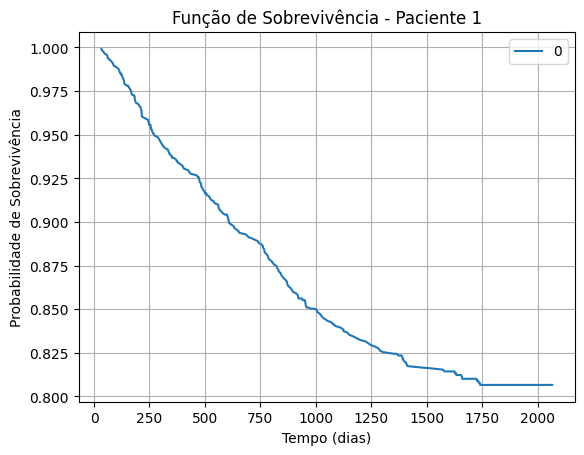

In [38]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Simulando os dados de pacientes
np.random.seed(123)
n = 100



# Treinando o modelo de Cox
cph = CoxPHFitter()
cph.fit(dados_filtrado, duration_col='time', event_col='event')

# Resumo do modelo
cph.print_summary()

# Visualização da função de sobrevivência de um paciente
patient = dados_filtrado.iloc[[0]]  # Pega o primeiro paciente
surv = cph.predict_survival_function(patient)
surv.plot(title='Função de Sobrevivência - Paciente 1')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid()
plt.show()


In [39]:
def resultado_paciente(index):
    # Seleciona o paciente pelo índice da linha
    patient = dados_filtrado.iloc[[index]]  # Duplo colchete mantém o DataFrame

    # Gera a função de sobrevivência estimada para esse paciente
    surv = cph.predict_survival_function(patient)

    # Plota a curva
    plt.figure(figsize=(8, 5))
    surv.plot()
    plt.title(f'Função de Sobrevivência - Paciente {patient.index[0]}')
    plt.xlabel('Tempo (dias)')
    plt.ylabel('Probabilidade de Sobrevivência')
    plt.grid(True)
    plt.show()


<Figure size 800x500 with 0 Axes>

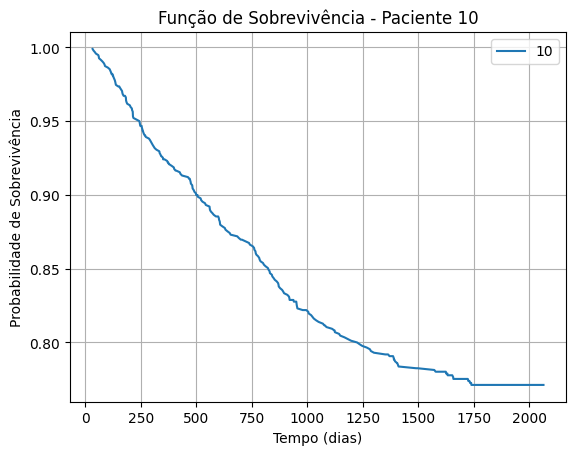

In [40]:
resultado_paciente(10)

<Figure size 800x500 with 0 Axes>

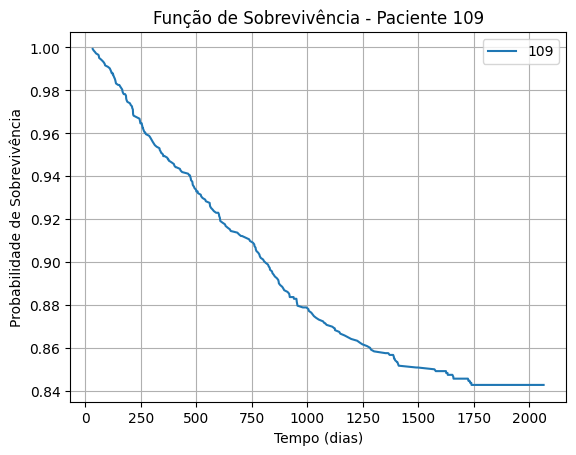

In [41]:
resultado_paciente(100)

# 📊 Interpretação dos Resultados da Regressão de Cox

## 🧠 Conceitos Básicos

- A regressão de Cox é usada para modelar o **tempo até um evento** (como morte súbita cardíaca).
- Ela estima o **risco relativo (hazard ratio)** de um paciente sofrer o evento com base em variáveis como ECG, idade, etc.
- O modelo calcula um **coeficiente (`coef`)** e o transforma em **`exp(coef)`** — que é o valor interpretável (hazard ratio).

---

## 📋 Como Ler os Coeficientes

### Exemplo: variável `age`

| Coluna             | Valor     | Interpretação                                         |
|--------------------|-----------|------------------------------------------------------|
| `coef`             | 0.03      | Aumenta o log-risco em 0.03 por ano de idade         |
| `exp(coef)`        | 1.03      | A cada ano a mais, o risco aumenta 3%                |
| `coef lower/upper` | 0.02–0.05 | Intervalo de confiança do coeficiente (95%)          |
| `p`                | <0.005    | Valor-p: estatisticamente significativo              |
| `z`                | 4.83      | Estatística Z = coef / erro padrão                   |

---

## ✅ Interpretação das Variáveis do Modelo

| Variável        | `exp(coef)` | Interpretação                                                             |
|-----------------|-------------|----------------------------------------------------------------------------|
| `qrs_duration`  | 1.01        | Cada 1 ms a mais no QRS → risco ↑ 1% (estatisticamente significativo)      |
| `qt_interval`   | 1.00        | QT maior → risco ↓ levemente (mas próximo de 1, efeito sutil)              |
| `age`           | 1.03        | A cada ano a mais → risco ↑ 3% (forte preditor)                            |
| `sex`           | 1.41        | Homens têm 41% mais risco de morte que mulheres                           |
| `hrv`           | 1.00        | Variabilidade da FC não foi significativa neste modelo (p = 0.11)          |

---

## 📈 Métricas do Modelo

| Métrica              | Valor   | Interpretação                                                              |
|----------------------|---------|-----------------------------------------------------------------------------|
| **Concordance**      | 0.64    | Qualidade preditiva (0.5 = aleatório, 1.0 = perfeito). 0.64 é razoável.     |
| **Partial AIC**      | 2702.64 | Critério de Akaike: usado para comparar modelos (menor = melhor)           |
| **Log-likelihood**   | 50.24   | Testa se o modelo é melhor que um modelo nulo (sem variáveis)              |

---

## 🧪 Conclusões Práticas

- O modelo tem **poder preditivo razoável** (`concordance = 0.64`).
- As variáveis **idade**, **duração do QRS** e **sexo** são **estatisticamente significativas** para prever risco de morte cardíaca.
- A **variabilidade da FC (HRV/SDNN)** não foi significativa neste modelo — mas pode ser útil em outro contexto.

---

## 🔜 Próximos Passos (Sugestões)

- Avaliar a **suposição de riscos proporcionais** da Cox.
- Incluir **outras variáveis derivadas do ECG** ou clínicas.
- Realizar **validação cruzada** ou com dados externos.
- Comparar grupos com curvas **Kaplan-Meier**.



# CoxPH é um modelo de riscos proporcionais de Cox também conhecido como DeepSurv

Agora vou usar o modelo com rede neural simples com duas camadas do pytoch chamada pycox

Neste caderno, treinaremos o[ método Cox-PH](https://jmlr.org/papers/volume20/18-424/18-424.pdf) , também conhecido como [DeepSurv](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-018-0482-1) . Usaremos os conjuntos de dados METABRIC como exemplo.

Uma introdução mais detalhada ao pycoxpacote pode ser encontrada neste [caderno](https://nbviewer.jupyter.org/github/havakv/pycox/blob/master/examples/01_introduction.ipynb) sobre o LogisticHazardmétodo.

O principal benefício que o Cox-CC (e os outros métodos de Cox) tem sobre o Logistic-Hazard é que ele é um método de tempo contínuo, o que significa que não precisamos discretizar a escala de tempo.

In [42]:

# !pip install lifelines       # modelo convecional cox
# !pip install pycox           # pycox (baseado em PyTorch)
# !pip install scikit-survival # scikit-survival (integra com scikit-learn)
# !pip install scipy==1.10.1
# ! pip install sklearn-pandas #Uncomment to install `sklearn-pandas`

# Depois reniciar o ambiente de execução
#!pip install torch


In [43]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv


np.random.seed(1234)
_ = torch.manual_seed(123)



## Conjunto de dados
- Carregamos o conjunto de dados METABRIC e dividimos em treinamento, teste e validação.



In [44]:
# df_train = metabric.read_df()
# df_test = df_train.sample(frac=0.2)
# df_train = df_train.drop(df_test.index)
# df_val = df_train.sample(frac=0.2)
# df_train = df_train.drop(df_val.index)

# df_train.head()

## Transformações de recursos
Temos 9 covariáveis, além das durações e indicadores de eventos.

- Padronizaremos as 5 covariáveis ​​numéricas e deixaremos as variáveis ​​binárias como estão. As variáveis ​​precisam ser do tipo 'float32', conforme exigido pelo PyTorch.

In [45]:



cols_standardize = ['x0', 'x1', 'x2', 'x3', 'x8']
cols_leave = ['x4', 'x5', 'x6', 'x7']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')


NameError: name 'df_train' is not defined


Não precisamos de transformações de rótulos


In [ ]:

get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = tt.tuplefy(x_val, y_val)

val.shapes()


- Com TupleTree(os resultados de tt.tuplefy), podemos facilmente repetir o conjunto de dados de validação várias vezes. Isso será útil para reduzir a variância da perda de validação, já que a perda de validação de CoxCCnão é determinística.



In [ ]:

val.repeat(2).cat().shapes()

NameError: name 'val' is not defined

## Rede neural
- Criamos um MLP simples com duas camadas ocultas: ativações ReLU, norma de lote e dropout. Aqui, usamos apenas a torchtuples.practical.MLPVanilla rede para fazer isso.

Observe que definimos out_features como 1 e que não temos output_bias.


In [ ]:



in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)


## Treinando o modelo
- Para treinar o modelo, precisamos definir um otimizador. Você pode escolher qualquer torch.optimotimizador, mas aqui usamos um de , tt.optim pois ele tem algumas funcionalidades adicionais. Usamos o Adam otimizador, mas em vez de escolher uma taxa de aprendizado, usaremos o esquema proposto por [Smith em 2017](https://arxiv.org/pdf/1506.01186) para encontrar uma taxa de aprendizado adequada com model.lr_finder. Veja esta publicação para uma explicação.


In [ ]:


model = CoxPH(net, tt.optim.Adam)

batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

lrfinder.get_best_lr()



Muitas vezes, essa taxa de aprendizagem é um pouco alta, então a definimos manualmente para 0,01

model.optimizer.set_lr(0.01)

Incluímos o EarlyStopping retorno de chamada para interromper o treinamento quando a perda de validação parar de melhorar. Após o treinamento, esse retorno de chamada também carregará o modelo com melhor desempenho em termos de perda de validação.


In [ ]:

epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

_ = log.plot()



Podemos obter o logaritmo parcial da verossimilhança
We can get the partial log-likelihood

In [ ]:


model.partial_log_likelihood(*val).mean()


## Previsão
- Para avaliação, precisamos primeiro obter estimativas de sobrevivência para o conjunto de teste. Isso pode ser feito com model.predict_surv which retorna um array de estimativas de sobrevivência ou com model.predict_surv_df which retorna as estimativas de sobrevivência como um dataframe.

- Entretanto, como CoxCCé semiparamétrico, primeiro precisamos obter as estimativas de risco de base não paramétricas com compute_baseline_hazards.

- Observe que, para grandes conjuntos de dados, o sampleargumento pode ser usado para estimar o risco de base em um subconjunto.


In [ ]:


_ = model.compute_baseline_hazards()

surv = model.predict_surv_df(x_test)

surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')




## Avaliação
- Podemos usar a EvalSurvclasse para avaliar a concordância, o escore de Brier e a verossimilhança logarítmica binomial. A configuração censor_surv='km' significa que estimamos a distribuição de censura de Kaplan-Meier no conjunto de teste.


In [ ]:

ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

ev.concordance_td()

time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ev.integrated_brier_score(time_grid)

ev.integrated_nbll(time_grid)